In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import rcParams

In [2]:
rcParams.update({'font.size': 22})

In [3]:
from BurstCube.LocSim.GRB import *
from BurstCube.LocSim.Detector import *
from BurstCube.LocSim.Spacecraft import *
from BurstCube.LocSim.Stats import calcNorms, addErrors, calcNormsWithError

In [4]:
#Evenly spaced around azimuth
#Staggered in zenith
#Arbitrary type
pointings = {'01': ('90:0:0','5:0:0'),
            '02': ('180:0:0','10:0:0'),
            '03': ('270:0:0','15:0:0'),
            '04': ('360:0:0','20:0:0')}

In [5]:
res = 250
rr,dd = np.meshgrid(np.linspace(0,360,res,endpoint=False),np.linspace(-90,90,res))
exposure_positions = np.vstack([rr.ravel(),dd.ravel()])

In [7]:
np.genfromtxt?

In [17]:
orbit = np.genfromtxt('data/BurstCube_ISS_LLA_Position_20180320_1200_Epoch.csv', skip_header=1, delimiter=',',
              dtype=[('Time', '|S20'), ('Lat', float), ('Lon', float), ('Alt', float),
                     ('Lat Rate', float),('Lon Rate', float), ('Alt Rate', float)])

In [18]:
less data/BurstCube_ISS_LLA_Position_20180320_1200_Epoch.csv

In [19]:
latlon = np.array([[deg2DMS(loc[1]),deg2DMS(loc[2])] for loc in orbit])

/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


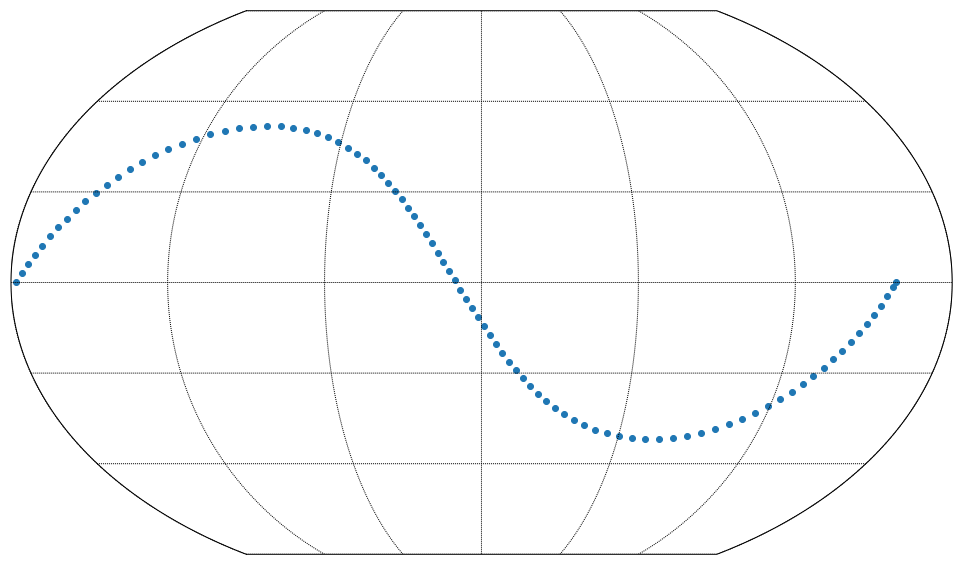

In [20]:
plt.figure(figsize=(20,10))
m = Basemap(projection='kav7',lon_0=180,resolution=None)
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
x,y = m(orbit['Lon'],orbit['Lat'])
m.scatter(x,y,marker='o',cmap=plt.cm.hsv)
plt.show()

In [21]:
def calcExposure(location):
    spacecraft = Spacecraft(pointings, lat=location[0],lon=location[1])
    exposures = np.array([[detector.exposure(position[0],position[1]) for position in exposure_positions.T] 
                      for detector in spacecraft.detectors])
    return exposures.sum(axis=0).reshape(res,res)

In [22]:
exp = [calcExposure(location) for location in latlon]

/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


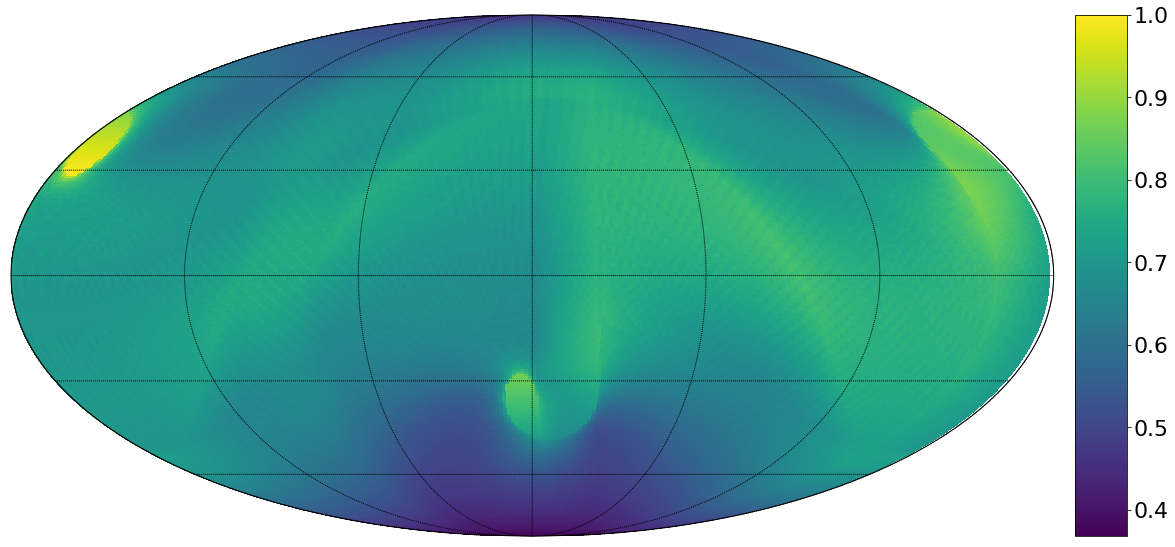

In [23]:
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',lon_0=180.,resolution='c')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
x,y = m(rr,dd)
m.pcolormesh(x,y,np.sum(exp,axis=0)/np.max(np.sum(exp,axis=0)))
m.colorbar()
plt.savefig('Plots/FigOrbit_Exposure.pdf')
plt.show()